# Introduction

## Configuration de l'environnement

In [17]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration du style des visualisations
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Chargement et préparation des données

In [18]:
# Charger le jeu de données
df = pd.read_excel("data/database.xlsx")

# Calcul de l'IMC (Indice de Masse Corporelle)
# IMC = Poids (kg) / (Taille (m))^2 ; conversion de la taille de cm à m
df['IMC'] = df['Poids (kg)'] / ((df['Taille (cm)'] / 100) ** 2)

# Création des classes d'âge
bins_age = [0, 35, 40, 45, 50, np.inf]
labels_age = ['Moins de 35 ans', '35-40', '40-45', '45-50', '50 et +']
df['Classe_age'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

# Création des classes d'IMC selon des seuils standards (OMS)
bins_imc = [18.5, 25, 30, np.inf]
labels_imc = ['Normale', 'Surpoids', 'Obésité']
df['Classe_IMC'] = pd.cut(df['IMC'], bins=bins_imc, labels=labels_imc)

# Affichage d'un aperçu et des informations
print("Aperçu des 5 premières lignes :")
print(df.head())
print("\nInformations sur les colonnes :")
df.info()
print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())
print("\nStatistiques descriptives pour les variables numériques :")
print(df.describe())

Aperçu des 5 premières lignes :
    ID Résidence Service_hospitalier Categorie_professionnelle  \
0   92     Ville            Urologie                 Infirmier   
1  121  Banlieue            Urologie                 Infirmier   
2  148  Banlieue         Cardiologie                 Infirmier   
3  161     Ville            Urologie                 Infirmier   
4  192     Ville         Cardiologie                 Infirmier   

  Contact_avec_le_sang Date_de_naissance  Age Sexe Contact_avec_le_patient  \
0                 Rare        1995-01-30   30    M                Fréquent   
1                 Rare        1995-01-30   30    M                Fréquent   
2                 Rare        1995-05-17   30    M                Fréquent   
3                 Rare        1995-01-30   30    M                Fréquent   
4                 Rare        1995-05-17   30    M                Fréquent   

   Annees_pratique_hospitaliere  ... Antecedents_ictere_hepatite Vaccination  \
0                     

## 2. Visualisations des données

### Graphique 1 : Répartition des individus suivant le genre

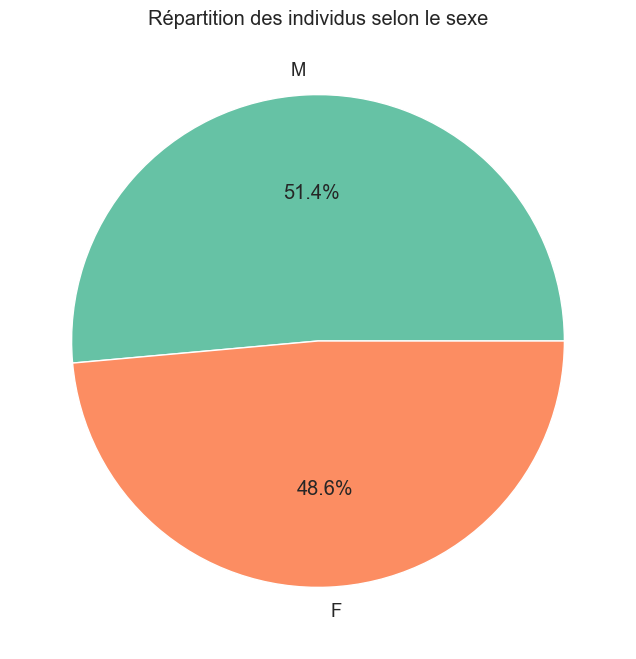

In [19]:
nb_sexe = df['Sexe'].value_counts()
plt.figure()
plt.pie(nb_sexe, labels=nb_sexe.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(nb_sexe)))
plt.title("Répartition des individus selon le sexe")
plt.show()

### Graphique 2 : Répartition des individus suivant les classes d’IMC

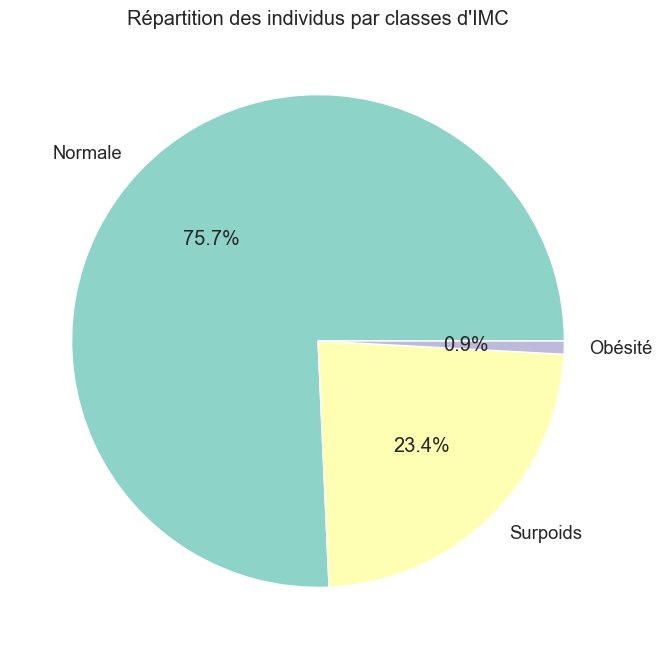

In [20]:
nb_IMC = df['Classe_IMC'].value_counts()
plt.figure()
plt.pie(nb_IMC, labels=nb_IMC.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", n_colors=len(nb_IMC)))
plt.title("Répartition des individus par classes d'IMC")
plt.show()

### Graphique 3 : Obésité (proportion d'individus en obésité)

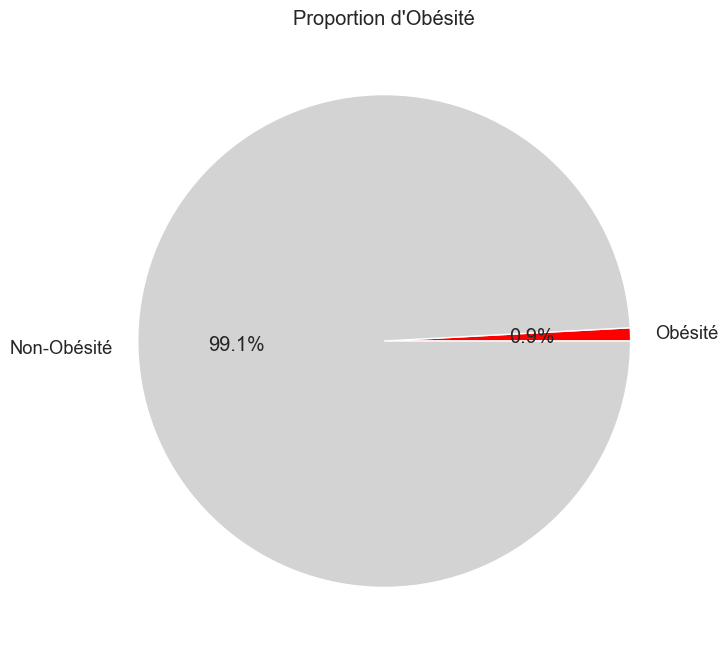

In [21]:
obesite_count = df['Classe_IMC'].value_counts().get('Obésité', 0)
total_count = len(df)
plt.figure()
plt.pie([obesite_count, total_count - obesite_count],
        labels=['Obésité', 'Non-Obésité'], autopct='%1.1f%%',
        colors=["red", "lightgray"])
plt.title("Proportion d'Obésité")
plt.show()

### Graphique 4 : Répartition des individus suivant les classes d’âge

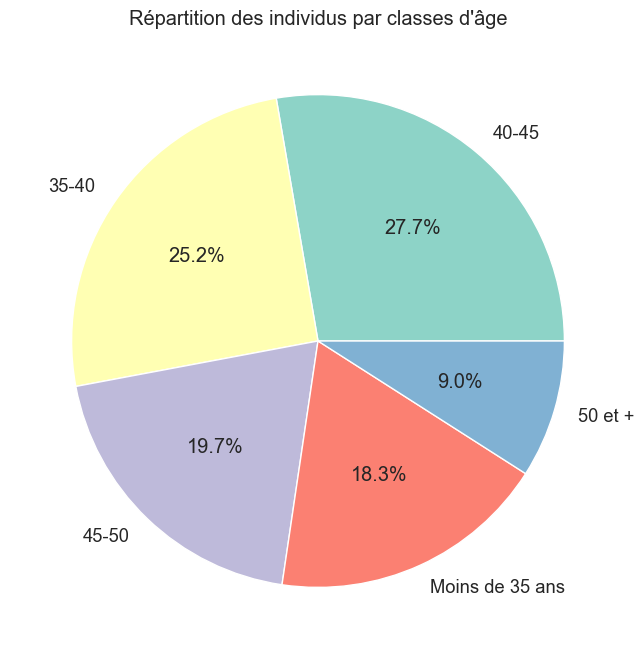

In [22]:
nb_age = df['Classe_age'].value_counts()
plt.figure()
plt.pie(nb_age, labels=nb_age.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", n_colors=len(nb_age)))
plt.title("Répartition des individus par classes d'âge")
plt.show()

### Graphique 5 : Répartition des individus suivant leur état matrimonial

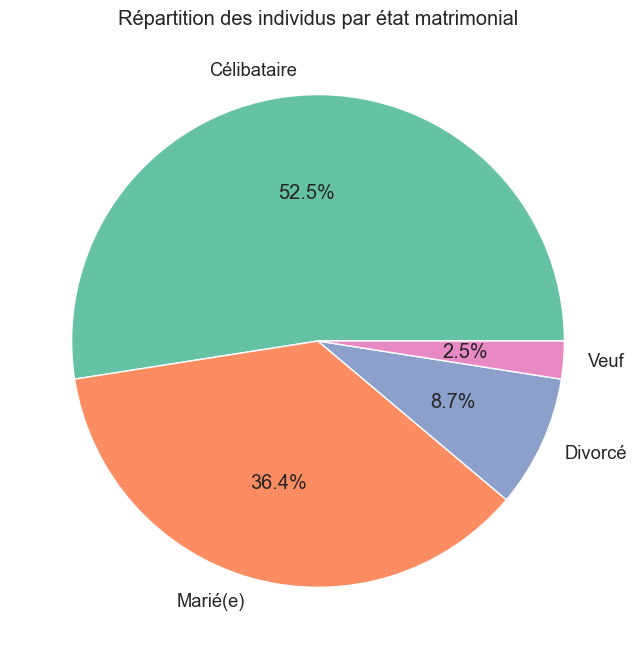

In [23]:
nb_matrim = df['Etat_matrimonial'].value_counts()
plt.figure()
plt.pie(nb_matrim, labels=nb_matrim.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(nb_matrim)))
plt.title("Répartition des individus par état matrimonial")
plt.show()

### Graphique 7 : Répartition des individus suivant leur catégorie professionnelle

C:\Users\user\AppData\Local\Temp\ipykernel_4792\1945283378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Categorie_professionnelle', palette="magma")


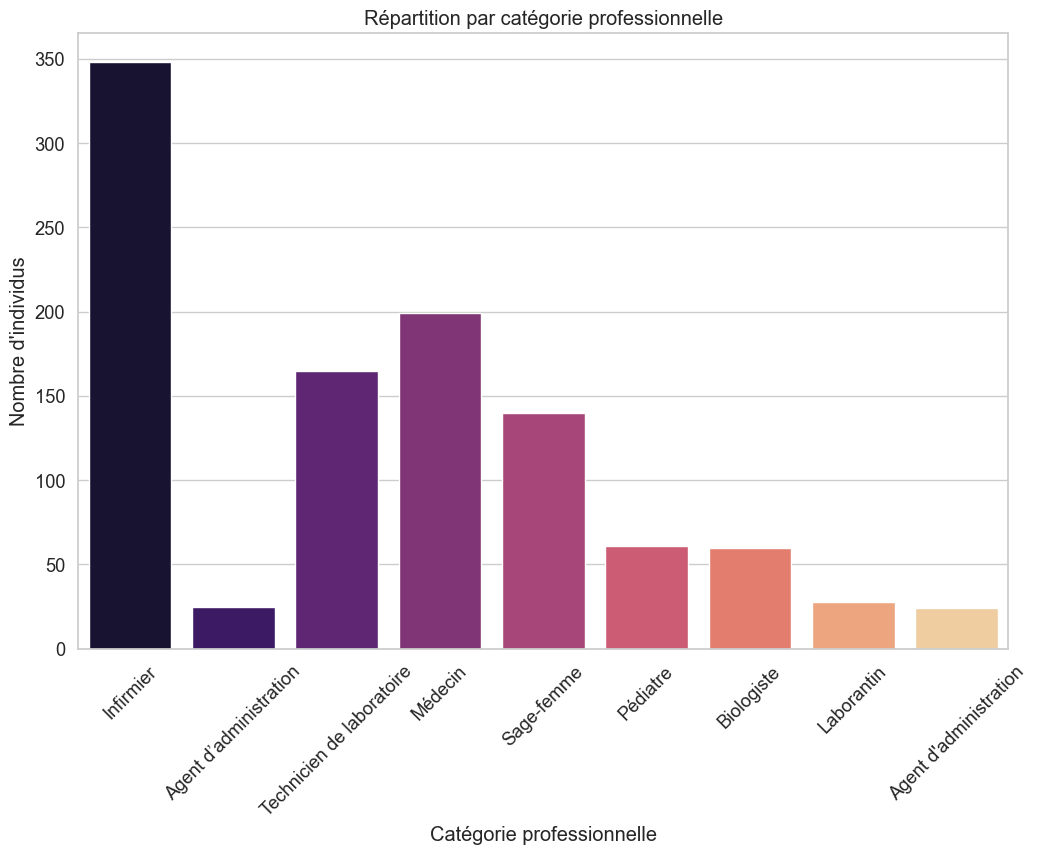

In [24]:
plt.figure()
sns.countplot(data=df, x='Categorie_professionnelle', palette="magma")
plt.title("Répartition par catégorie professionnelle")
plt.xlabel("Catégorie professionnelle")
plt.ylabel("Nombre d'individus")
plt.xticks(rotation=45)
plt.show()

### Graphique 8 : Répartition des individus suivant leur groupe sanguin

C:\Users\user\AppData\Local\Temp\ipykernel_4792\1583017818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Groupe_sanguin', palette="coolwarm")


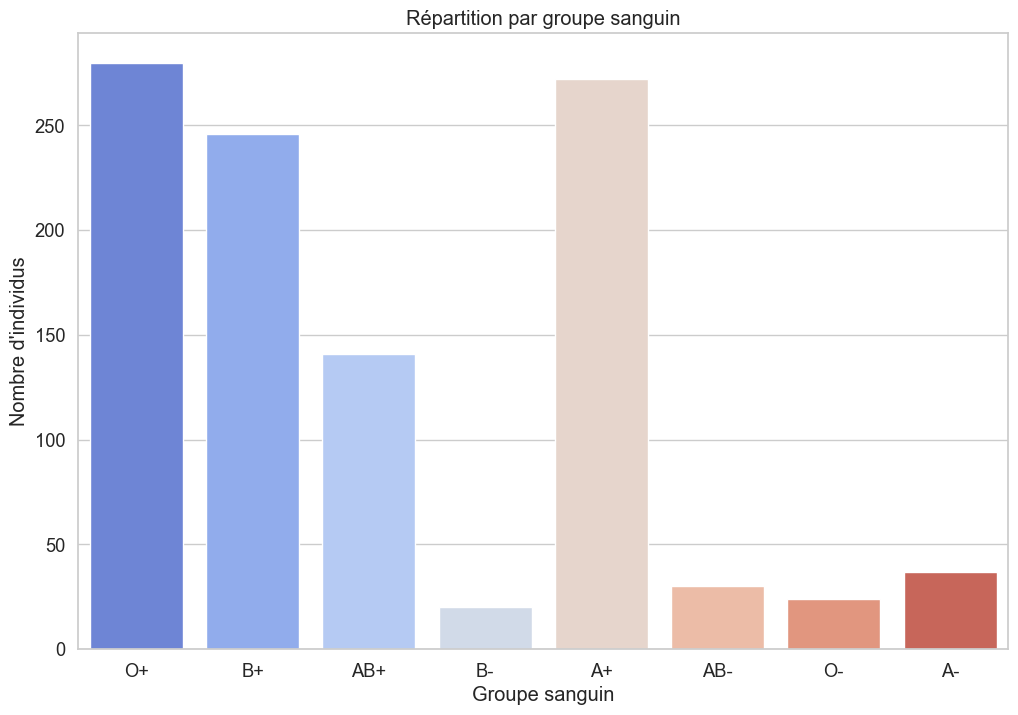

In [25]:
plt.figure()
sns.countplot(data=df, x='Groupe_sanguin', palette="coolwarm")
plt.title("Répartition par groupe sanguin")
plt.xlabel("Groupe sanguin")
plt.ylabel("Nombre d'individus")
plt.show()

### Graphique 10 : Relation entre l’infection au VHB et l’état matrimonial

<Figure size 1200x800 with 0 Axes>

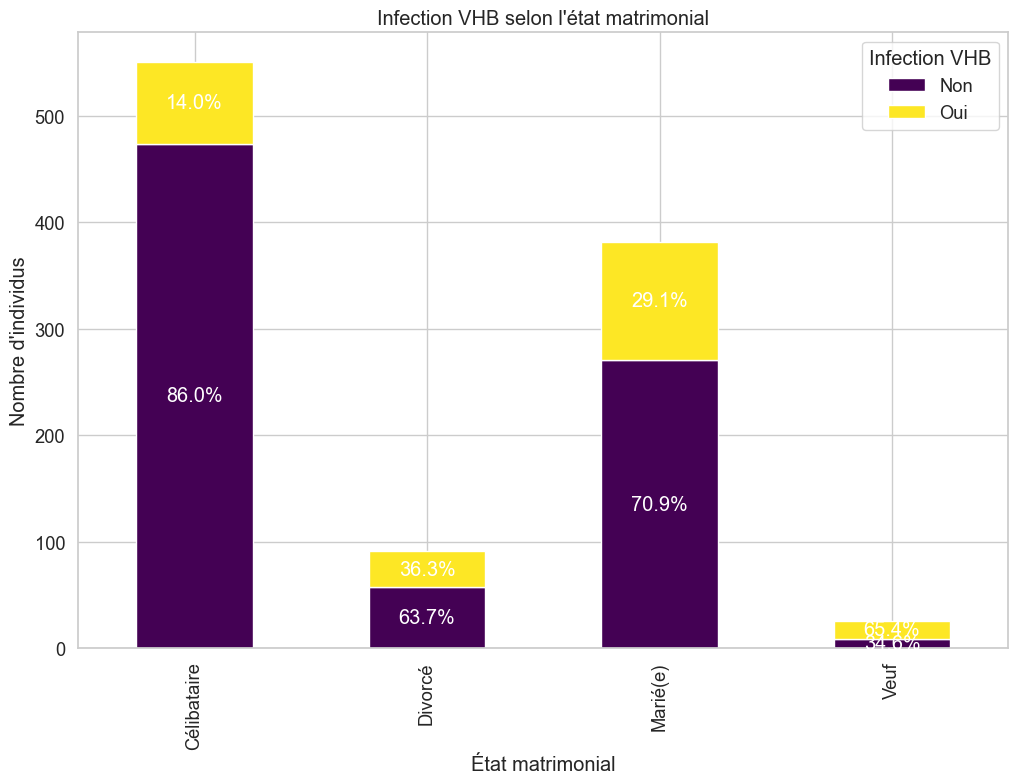

In [26]:
plt.figure()
ct = pd.crosstab(df['Etat_matrimonial'], df['Infection_VHB'])
ct.plot(kind='bar', stacked=True, colormap='viridis')

# Calcul des pourecntages pour les ajouter au niveau des barres
for i in range(ct.shape[0]):
    total = ct.iloc[i].sum()
    for j in range(ct.shape[1]):
        if total > 0:
            percentage = ct.iloc[i, j] / total * 100
            plt.text(i, ct.iloc[i, :j+1].sum() - ct.iloc[i, j] / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')

plt.title("Infection VHB selon l'état matrimonial")
plt.xlabel("État matrimonial")
plt.ylabel("Nombre d'individus")
plt.legend(title='Infection VHB')
plt.show()

### Graphique 11 : Relation entre l’infection au VHB et les différentes classes d’IMC

<Figure size 1200x800 with 0 Axes>

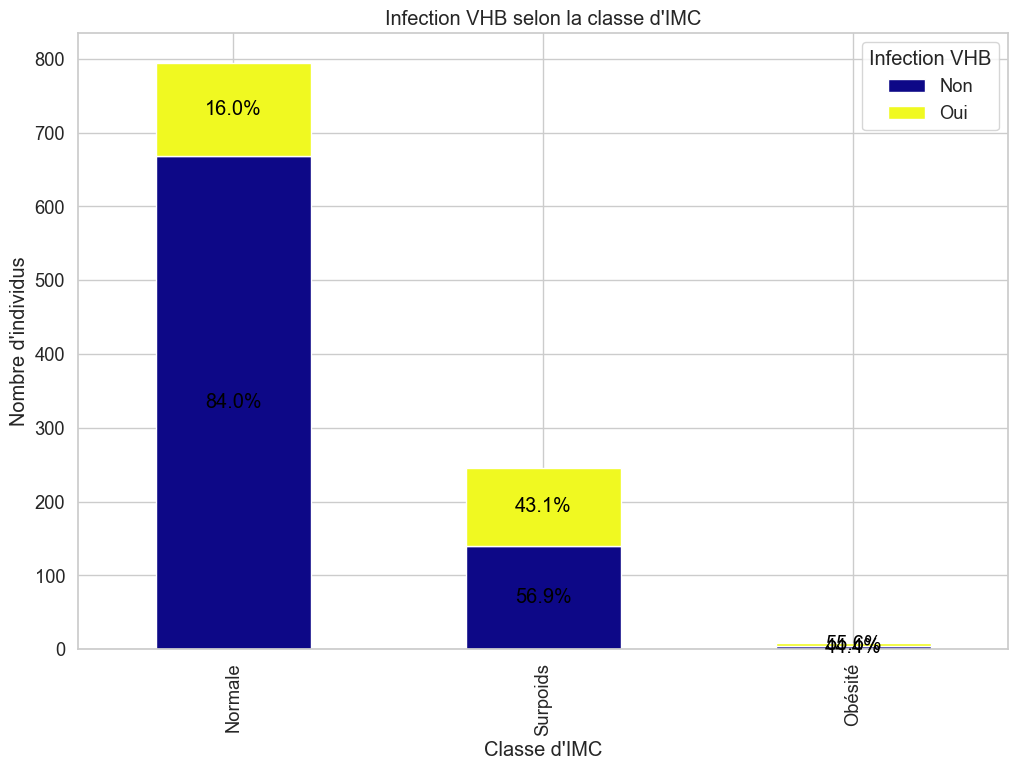

In [27]:
plt.figure()
ct = pd.crosstab(df['Classe_IMC'], df['Infection_VHB'])
ct = ct.reindex(labels_imc)
ct.plot(kind='bar', stacked=True, colormap='plasma')

# Calcul des pourecntages pour les ajouter au niveau des barres
for i in range(ct.shape[0]):
    total = ct.iloc[i].sum()
    for j in range(ct.shape[1]):
        if total > 0:
            percentage = ct.iloc[i, j] / total * 100
            plt.text(i, ct.iloc[i, :j+1].sum() - ct.iloc[i, j] / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')

plt.title("Infection VHB selon la classe d'IMC")
plt.xlabel("Classe d'IMC")
plt.ylabel("Nombre d'individus")
plt.legend(title='Infection VHB')
plt.show()


### Graphique 12 : Relation entre l’infection au VHB et le contact avec le sang

<Figure size 1200x800 with 0 Axes>

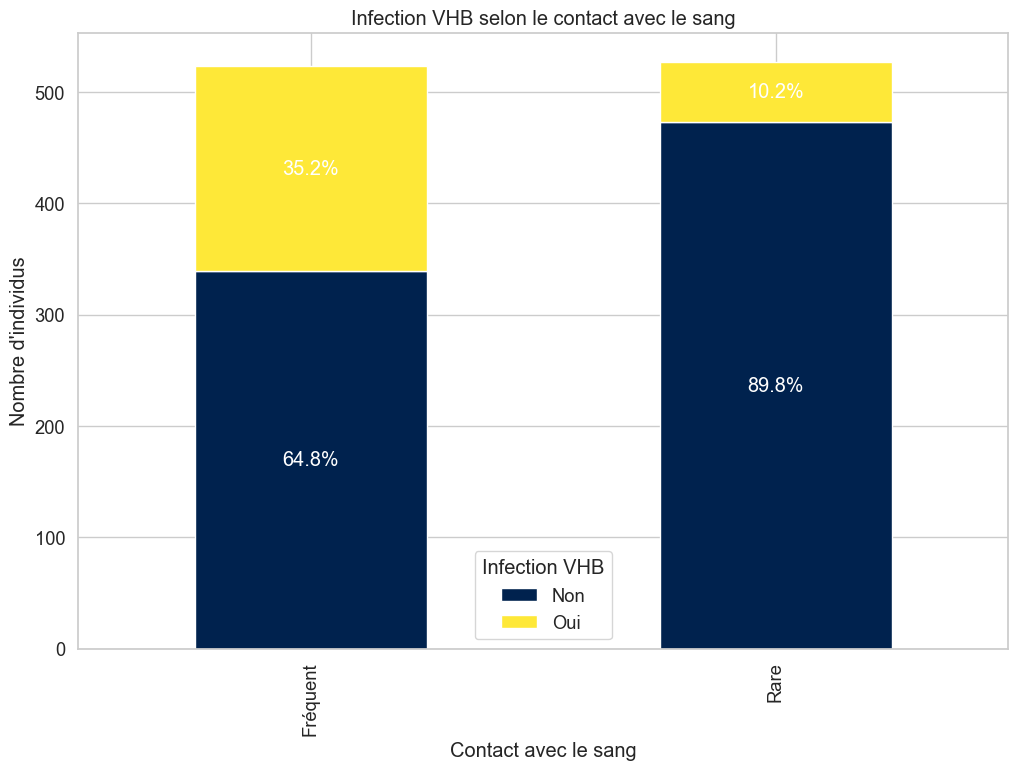

In [28]:
plt.figure()
ct = pd.crosstab(df['Contact_avec_le_sang'], df['Infection_VHB'])
ct.plot(kind='bar', stacked=True, colormap='cividis')

# Calcul des pourecntages pour les ajouter au niveau des barres
for i in range(ct.shape[0]):
    total = ct.iloc[i].sum()
    for j in range(ct.shape[1]):
        if total > 0:
            percentage = ct.iloc[i, j] / total * 100
            plt.text(i, ct.iloc[i, :j+1].sum() - ct.iloc[i, j] / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')

plt.title("Infection VHB selon le contact avec le sang")
plt.xlabel("Contact avec le sang")
plt.ylabel("Nombre d'individus")
plt.legend(title='Infection VHB')
plt.show()

### Graphique 13 : Relation entre l’infection au VHB et le groupe sanguin

<Figure size 1200x800 with 0 Axes>

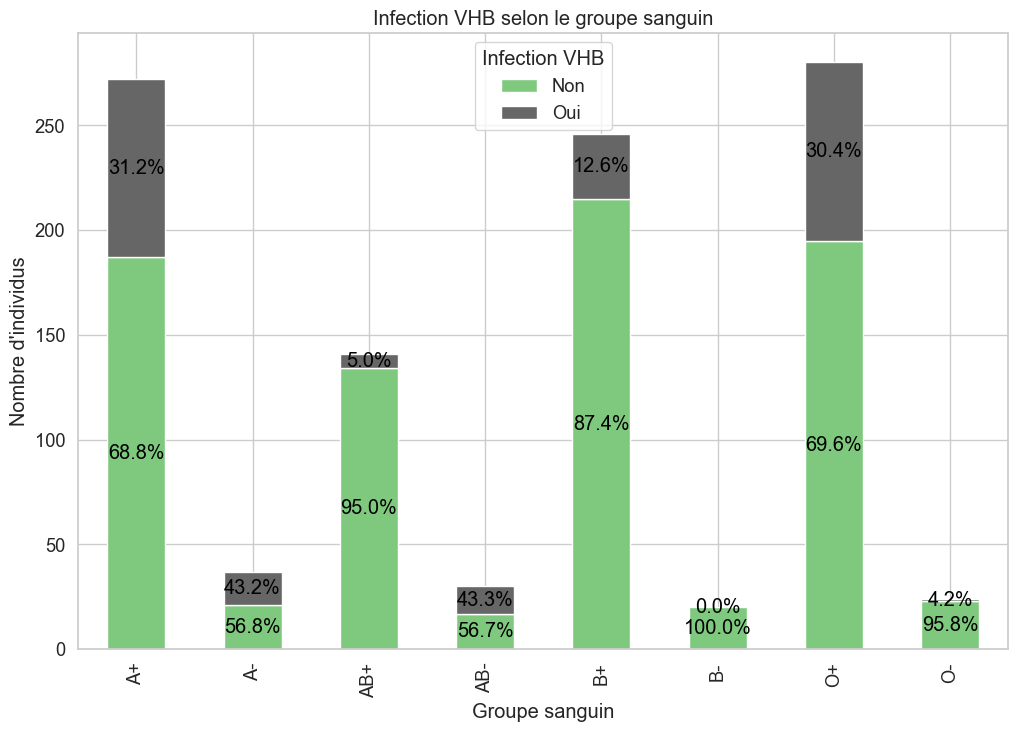

In [29]:
plt.figure()
ct = pd.crosstab(df['Groupe_sanguin'], df['Infection_VHB'])
ct.plot(kind='bar', stacked=True, colormap='Accent')

# Calcul des pourecntages pour les ajouter au niveau des barres
for i in range(ct.shape[0]):
    total = ct.iloc[i].sum()
    for j in range(ct.shape[1]):
        if total > 0:
            percentage = ct.iloc[i, j] / total * 100
            plt.text(i, ct.iloc[i, :j+1].sum() - ct.iloc[i, j] / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')

plt.title("Infection VHB selon le groupe sanguin")
plt.xlabel("Groupe sanguin")
plt.ylabel("Nombre d'individus")
plt.legend(title='Infection VHB')
plt.show()


### Boxplots pour détecter les outliers sur la variable Poids

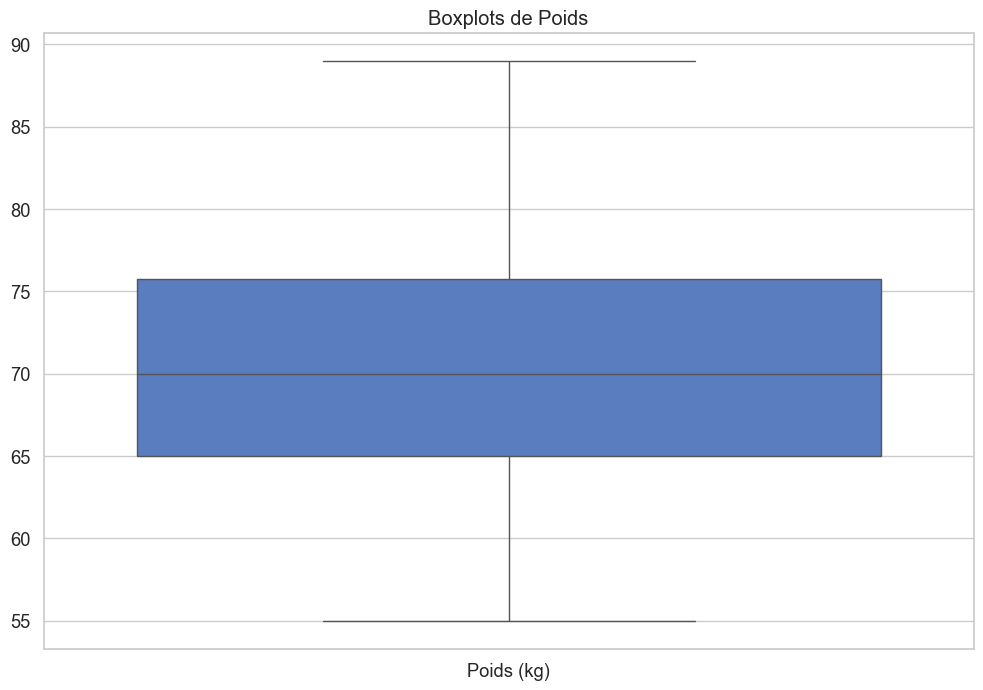

In [30]:
plt.figure()
sns.boxplot(data=df[['Poids (kg)']])
plt.title("Boxplots de Poids")
plt.show()

### Boxplots pour détecter les outliers sur la variable Taille

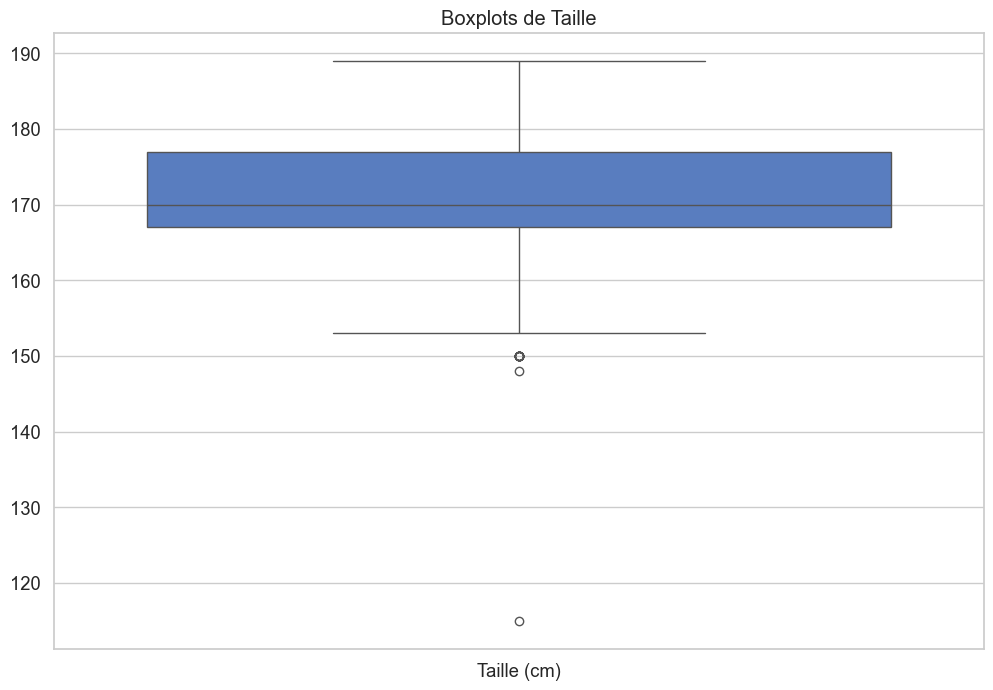

In [31]:
plt.figure()
sns.boxplot(data=df[['Taille (cm)']])
plt.title("Boxplots de Taille")
plt.show()

### Boxplots pour détecter les outliers sur la variable Age

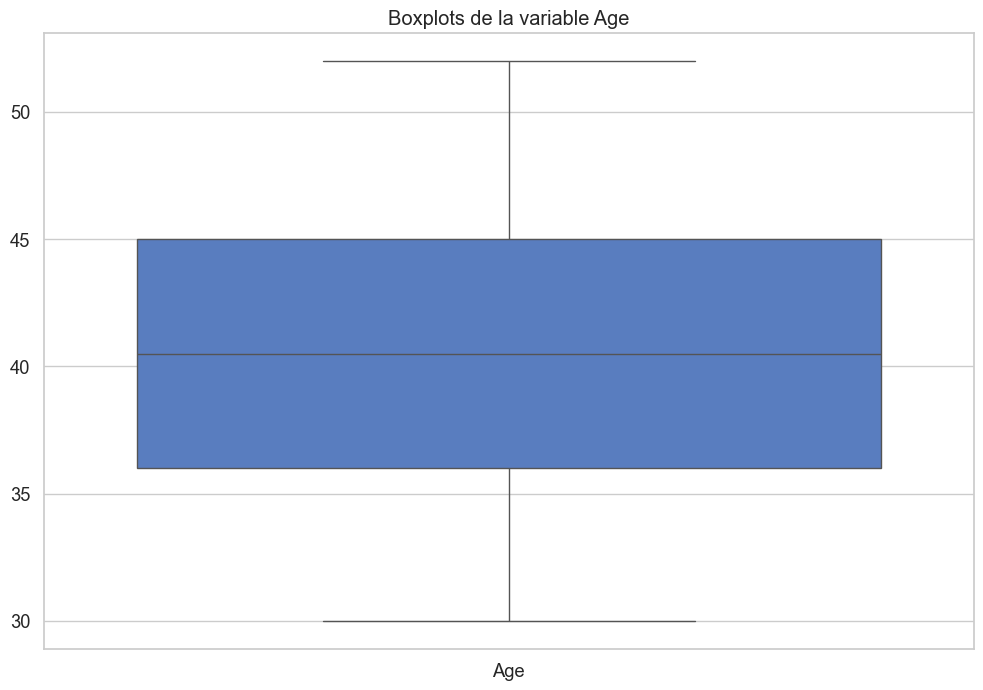

In [32]:
plt.figure()
sns.boxplot(data=df[['Age']])
plt.title("Boxplots de la variable Age")
plt.show()

### Matrice de corrélation pour les variables numériques

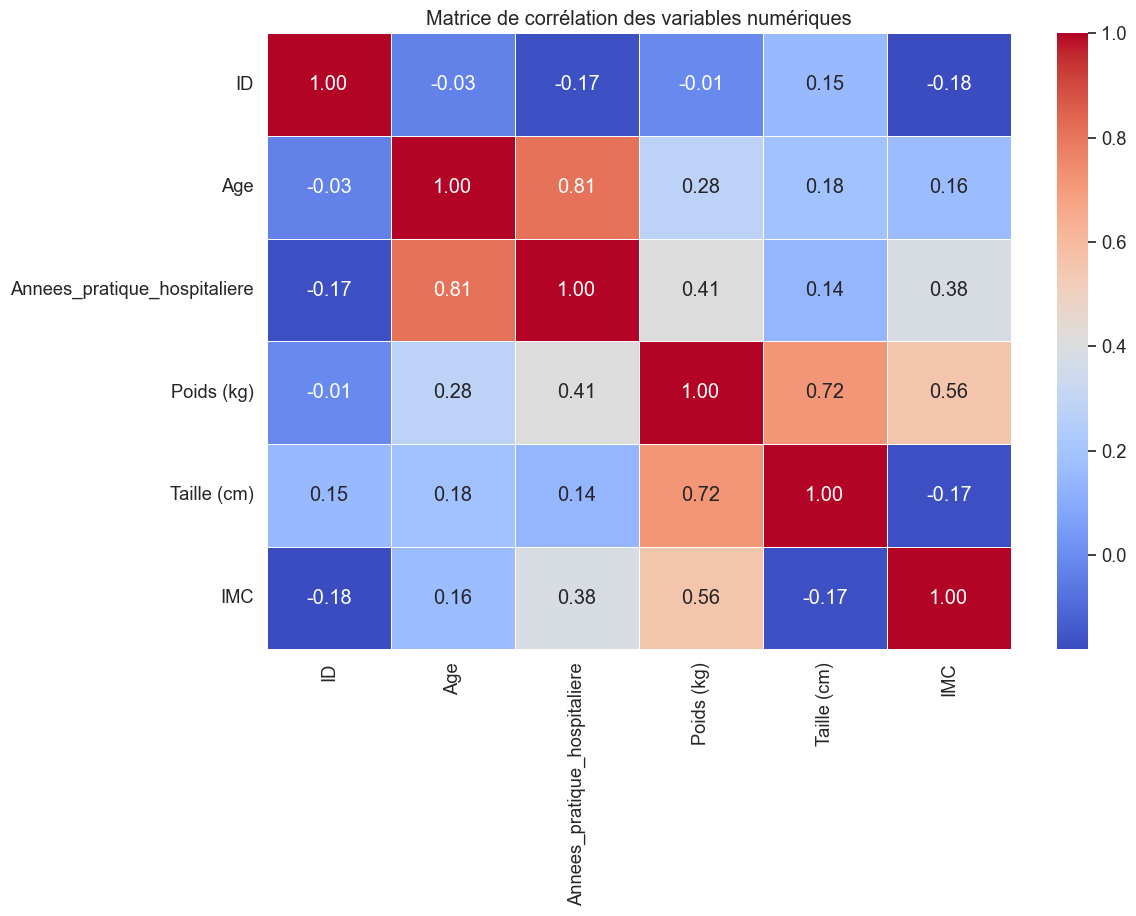

In [33]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation des variables numériques")
plt.show()